## Singluar Value Decomposition

- reference: https://en.wikipedia.org/wiki/Singular_value_decomposition
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/220px-Singular_value_decomposition_visualisation.svg.png)

**SVD는 위의 도식과 같이 $A = U{\Sigma}V^{T}$로 나타낸다.**

where $A$ is rectangular matrix $A \in \mathbf{R}^{m \times n}$

, $U \in \mathbf{R}^{m \times m}$ 는 orthnormal한 columns을 가지고 있다.

, $V \in \mathbf{R}^{n \times n}$ 는 orthnormal한 columns를 가지고 있으며 따라서 $V^{T}$는 orthonormal한 row를 가지게 된다.

$\Sigma \in \mathbf{R}^{m \times n}$ 는 대각행렬(diagonal matrix)로 성분이 점차 감소한다. (앞 부분이 더 큰 숫자를 가진다.)

## Intuitive interpretations: Rotation, Scaling

![image2](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/220px-Singular-Value-Decomposition.svg.png)

- 우측 상단: 기본 vector, 이 vector가 어떻게 움직이는지 살펴보자

- 좌측 상단: matrix M에 의한 우측 상단의 vector의 변화 모습을 보여줌.

- 우측 하단: 기본 vector에 maxtrix $V^{T}$에 의한 선형변환

- 좌측 하단: 기본 vector에 maxtrix $V^{T}\Sigma$에 의한 선형변환

$\Sigma$는 위의 그림에서와 같이 수평의 방향 혹은 수직의 방향으로 각각의 element의 값만큼 scale하는 효과를 가진다.

## SVD as sum of outer products
<img src="https://slideplayer.com/slide/10565414/36/images/8/Singular+Value+Decomposition.jpg" width="700" height="500" />
<img src="https://i.stack.imgur.com/qEPYe.png" width="700" height="500" />


## Another perspective of SVD


$U = [u_1, u_2, \cdots, u_{n}] \in \mathbf{R}^{m \times n}$, $V =[v_1, v_2, \cdots, v_{n} \in \mathbf{R}^{n \times n}]$

and $\Sigma = \begin{bmatrix} 
\sigma_1 & & \\
& \ddots & \\
& & \sigma_{n}
\end{bmatrix} \in \mathbf{R}^{n \times n}$라고 가정한다.

$AV = A[v_1, v_2, \cdots, v_{n}] = [Av_1, Av_2, \cdots, A_{n}]$ 이며 

$U\Sigma =[u_1, u_2, \cdots, u_n]\begin{bmatrix} 
\sigma_1 & & \\
& \ddots & \\
& & \sigma_{n}
\end{bmatrix} = [\sigma u_1, \sigma_2 u_2, \cdots, \sigma u_{n}]$ 이다.

$AV = U \Sigma$ 이고 $V^{-1} = V^{T}$가 된다. ($V \in \mathbf{R} ^{n*n}$dms orthonormal columns를 가지기 때문)

그러므로, $AV = U\Sigma \iff A = U\Sigma V^{T} $

In [2]:
import numpy as np
A = np.array([[3,6], [2,3], [0,0], [0,0]]) # 직사각행렬
A

array([[3, 6],
       [2, 3],
       [0, 0],
       [0, 0]])

In [4]:
u, s, vt = np.linalg.svd(A)
print(u)
print(s)
print(vt)

[[-0.8816746  -0.47185793  0.          0.        ]
 [-0.47185793  0.8816746   0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[7.60555128 0.39444872]
[[-0.47185793 -0.8816746 ]
 [ 0.8816746  -0.47185793]]


In [14]:
# othornormal rows of vt
np.dot(vt[0], vt[1])

0.0

In [24]:
# othonormal colums of U
u1 = u[:,0]
u2 = u[:,1]
u3 = u[:,2]
u4 = u[:,3]

cols = [u1, u2, u3, u4]
for i in range(4):
    for j in range(i + 1, 4):
        print(np.dot(cols[i], cols[j]))
        

-5.551115123125783e-17
0.0
0.0
0.0
0.0
0.0


In [9]:
s = np.diag(s)
s = np.concatenate([s, np.zeros((2,2))], axis = 0)
s

array([[7.60555128, 0.        ],
       [0.        , 0.39444872],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [11]:
# restore
np.dot(np.dot(u, s), vt)

array([[3., 6.],
       [2., 3.],
       [0., 0.],
       [0., 0.]])

([0], [0])


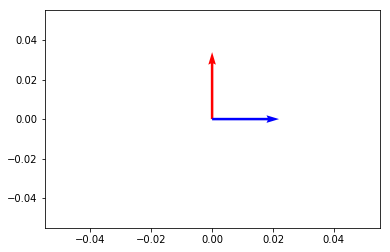

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
base = np.array([[0, 1], [1, 0]])
origin = [0], [0]
print(origin)
plt.quiver(*origin, base[:,0], base[:,1], color=['r','b','g'], scale=5)
plt.show()

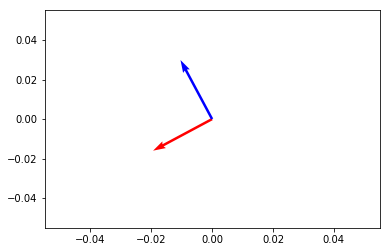

In [38]:
# transformation by vt: rotation
base_vt = np.dot(vt, base)
base_vt

plt.quiver(*origin, base_vt[:,0], base_vt[:,1], color=['r','b','g'], scale=5)
plt.show()

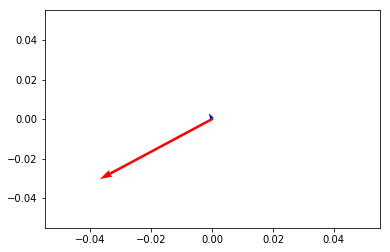

In [43]:
# transformation by s: scaling
base_vt_sigma = np.dot(s, base_vt)
plt.quiver(*origin, base_vt_sigma[:,0], base_vt_sigma[:,1], color=['r','b','g'], scale=20)
plt.show()

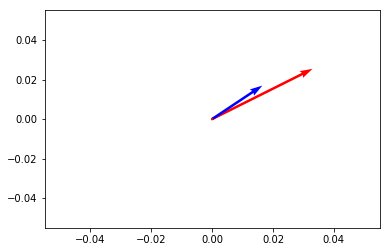

In [45]:
# transformation by u: rotation
base_vt_sigma_u = np.dot(u, base_vt_sigma)
plt.quiver(*origin, base_vt_sigma_u[:,0], base_vt_sigma_u[:,1], color=['r','b','g'], scale=20)
plt.show()

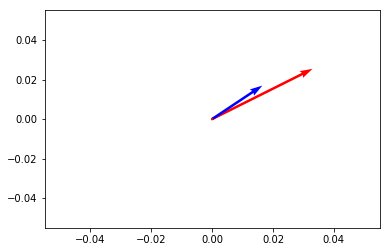

In [47]:
# transformation by A: same 
A_base = np.dot(A, base)
plt.quiver(*origin, A_base[:,0], A_base[:,1], color=['r','b','g'], scale=20)
plt.show()